In [1]:
#We will Sanitize the data and Save at Sanitized Folder


In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1)

All Feature Lists:

['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd RST Flags', 'Bwd RST Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWR Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'ICMP Code', 'ICMP Type', 'Fwd TCP Retrans. Count', 'Bwd TCP Retrans. Count', 'Total TCP Retrans. Count', 'Total TCP Flow Time']

In [7]:
#Data Sources
PATH = './dataset'
clients = {
    'client_1': f"{PATH}/client_1_dataset.csv",
    'client_2': f"{PATH}/client_2_dataset.csv",
    'client_3': f"{PATH}/client_3_dataset.csv",
    'client_4': f"{PATH}/client_4_dataset.csv"
}

In [146]:
current_client_key = 'client_4'
current_client = clients[current_client_key]

In [147]:
train_df = pd.read_csv(current_client)

In [148]:
#Total Record
print("Total: ",len(train_df['Flow Duration']))
#Recoreds per Lavel
Label_counts = train_df['Label'].value_counts()
print (Label_counts)

Total:  420000
Label
0    210000
1    210000
Name: count, dtype: int64


In [149]:
#Dependent and Independed Feature Separation

features = train_df.columns.values.tolist()
feature_to_exclude = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'Label', 'CSV_File_Number']
output_features = ['Label']
input_features = [feature for feature in features if feature not in feature_to_exclude]

In [150]:
output_df = train_df[output_features]
input_df = train_df[input_features]

In [151]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_df)
scaled_df = pd.DataFrame(scaled_data, columns = input_df.columns)

In [152]:
scaled_df[['Flow Duration', 'Protocol']].describe().round(2)

,Flow Duration,Protocol
count,420000.00,420000.00
mean,-0.00,-0.00
std,1.00,1.00
min,-0.18,-1.98
25%,-0.18,-0.29
50%,-0.13,-0.29
75%,0.02,-0.29
max,27.73,3.44


In [153]:
pca_component_count = len(scaled_df.columns)
pca = PCA(n_components = pca_component_count)
data_pca = pca.fit_transform(scaled_data)

Text(0, 0.5, 'cumulative explained variance')

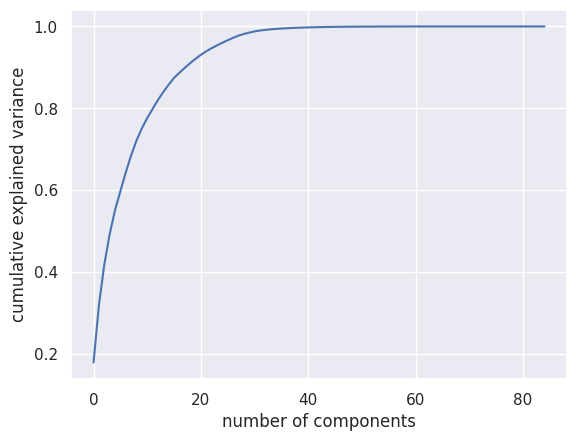

In [154]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [155]:
pca.explained_variance_ #Actual Variances unit is feature unit**2

array([1.50340217e+01, 1.17464545e+01, 8.33080349e+00, 6.21160908e+00,
       4.97967404e+00, 3.91047627e+00, 3.82262443e+00, 3.49389080e+00,
       3.04408774e+00, 2.51376950e+00, 2.10842175e+00, 1.87154172e+00,
       1.83949387e+00, 1.64541961e+00, 1.49977103e+00, 1.39572670e+00,
       1.05546083e+00, 1.00130110e+00, 9.70519196e-01, 8.93605552e-01,
       8.14709215e-01, 7.15929362e-01, 6.45622350e-01, 5.74304011e-01,
       5.42495120e-01, 5.11276633e-01, 4.97448661e-01, 4.37990078e-01,
       3.49408606e-01, 2.79999177e-01, 2.49732494e-01, 1.73586195e-01,
       1.34364167e-01, 1.12879997e-01, 9.46187471e-02, 7.22495710e-02,
       6.07484137e-02, 5.06381704e-02, 4.27639222e-02, 3.99042741e-02,
       3.38640451e-02, 2.82030279e-02, 2.65256267e-02, 2.33403560e-02,
       2.02254741e-02, 1.65831048e-02, 1.33802423e-02, 1.07398062e-02,
       9.88277852e-03, 7.90604386e-03, 5.82555820e-03, 5.22269794e-03,
       4.27253438e-03, 4.05351020e-03, 3.51189723e-03, 3.14374624e-03,
      

In [156]:
## It is ratio of pca.explained_variance_/sum(pca.explained_variance_) so it represents a ratio/percentage of total variances
pca.explained_variance_ratio_

array([1.78976023e-01, 1.39838411e-01, 9.91759959e-02, 7.39475511e-02,
       5.92816926e-02, 4.65531781e-02, 4.55073253e-02, 4.15938391e-02,
       3.62390535e-02, 2.99257561e-02, 2.51001991e-02, 2.22802055e-02,
       2.18986844e-02, 1.95882820e-02, 1.78543745e-02, 1.66157544e-02,
       1.25649800e-02, 1.19202228e-02, 1.15537724e-02, 1.06381360e-02,
       9.69889613e-03, 8.52294830e-03, 7.68596206e-03, 6.83693624e-03,
       6.45825986e-03, 6.08661210e-03, 5.92199377e-03, 5.21415518e-03,
       4.15961635e-03, 3.33331560e-03, 2.97299880e-03, 2.06649740e-03,
       1.59956961e-03, 1.34380629e-03, 1.12641097e-03, 8.60111892e-04,
       7.23193679e-04, 6.02833926e-04, 5.09093100e-04, 4.75049752e-04,
       4.03142435e-04, 3.35749533e-04, 3.15780518e-04, 2.77860719e-04,
       2.40778880e-04, 1.97417444e-04, 1.59288219e-04, 1.27854531e-04,
       1.17651845e-04, 9.41193457e-05, 6.93517182e-05, 6.21748275e-05,
       5.08633835e-05, 4.82559589e-05, 4.18082008e-05, 3.74254614e-05,
      

In [157]:
loadings = pca.components_  # Shape: (n_pca, n_features) each pca is a linkear combination of features
explained_variance = pca.explained_variance_  # Shape: (85,) # Actual variances for pca componenets
#Optionally, take the square root of the explained variance
sqrt_explained_variance = np.sqrt(explained_variance)  # Optional: sqrt of variance

In [158]:
# Select the first 35 components
selected_components = loadings[:35]
selected_explained_variance = sqrt_explained_variance[:35]  # Use sqrt if desired

In [159]:
print(selected_components.shape)
print(selected_explained_variance.shape)

(35, 85)
(35,)


In [160]:
# Calculate the weighted feature importances using the (sqrt) explained variance as weights
weighted_importances_matrix = np.abs(selected_components) * selected_explained_variance[:, np.newaxis]

In [161]:
weighted_importances_matrix.shape

(35, 85)

In [162]:
feature_importances = weighted_importances_matrix.sum(axis=0)
normalized_feature_importances = feature_importances / feature_importances.sum()

In [163]:
feature_importance_df = pd.DataFrame({
    'Feature': input_df.columns,
    'Importance': feature_importances,
    'Normalized Importance': normalized_feature_importances
})


In [164]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [165]:
print(feature_importance_df.head(20)) 

                       Feature  Importance  Normalized Importance
27                 Bwd IAT Std    4.377925               0.016904
6        Fwd Packet Length Max    4.313439               0.016655
14                Flow Bytes/s    4.265199               0.016469
28                 Bwd IAT Max    4.180457               0.016141
45              FIN Flag Count    4.141903               0.015993
17                Flow IAT Std    4.022183               0.015530
66           Subflow Bwd Bytes    3.899776               0.015058
58         Fwd Packet/Bulk Avg    3.863120               0.014916
11       Bwd Packet Length Min    3.824210               0.014766
9        Fwd Packet Length Std    3.788893               0.014630
22                 Fwd IAT Std    3.752998               0.014491
34               Fwd RST Flags    3.752028               0.014487
70            Fwd Seg Size Min    3.750564               0.014482
53               Down/Up Ratio    3.740606               0.014443
0         

In [166]:
feature_importance_df.to_csv(f'weighted_feature_importances_{current_client_key}.csv', index=False)